In [2]:
import json
import torch
import json

In [3]:
#creating array for synthesis recipes
lines = []
with open('project_synth_vec_data.csv') as f:
    lines = f.readlines()

count = 0
synth_vec = {}
for line in lines:
    count += 1
    line = line.replace("\"","")
    line = line.split(",")
    synth_vec[int(line[0])] = []
    #for i in range(len(line)-1):
    synth_vec[int(line[0])] = line[1:len(line)-1]
    #print (synth_vec)    
    #print(f'line {count}: {line[0],synth_vec[line[0]]}')

for key in synth_vec:
    #print(key)
    for j in range(len(synth_vec[key])):
        synth_vec[key][j] = int(synth_vec[key][j])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [4]:
#creating final dataset,columns:design name,no of AND gates, no of NOT gates, IP length, Area,Syn Vectors(synthesis recipes),Delay
#splitting into train and test data
X_train = []
Y_train = []
train = []

X_test = []
Y_test = []
test = []

f = open('train_datapoints.json')
data_x = json.load(f)
#print (data_x)
designs = list(data_x.keys())
print ("data_x", len(data_x))
for i in range(len(data_x)):
    for j in data_x[designs[i]]:
        ll = int(j)
        dummy_x = [designs[i],data_x[designs[i]][j][0],data_x[designs[i]][j][1],data_x[designs[i]][j][2], data_x[designs[i]][j][3]]
        for k in range(len(synth_vec[ll-1])):
            dummy_x.extend([synth_vec[ll-1][k]])
        dummy_x.extend([data_x[designs[i]][j][4]]) # delay should be the last element    
        train.append(dummy_x)
        
print (train[1])        
f = open('test_datapoints.json')
data_t = json.load(f)
print ("data_t", len(data_t))
for i in range(len(data_t)):
    for j in data_t[designs[i]]:
        ll = int(j)
        dummy_x = [designs[i],data_t[designs[i]][j][0], data_t[designs[i]][j][1],data_t[designs[i]][j][2], data_t[designs[i]][j][3]]
        for k in range(len(synth_vec[ll-1])):
            dummy_x.extend([synth_vec[ll-1][k]])
        dummy_x.extend([data_t[designs[i]][j][4]]) # delay should be the last element
        test.append(dummy_x)
        #test.append([data_t[designs[i]][j][2], data_t[designs[i]][j][3], data_t[designs[i]][j][4]])
        #test.append([data_t[designs[i]][j][0], data_t[designs[i]][j][1], 
        #               data_t[designs[i]][j][3], data_t[designs[i]][j][4]])
print (test[1])

data_x 42
['Rocket_csr', 6689, 7159, 19, 4923.93, 1, 0, 3, 6, 4, 6, 5, 2, 0, 2, 6, 4, 6, 2, 4, 6, 6, 0, 6, 6041.4]
data_t 42
['Rocket_csr', 6633, 7035, 20, 5001.6, 1, 6, 4, 4, 1, 1, 5, 4, 3, 0, 0, 2, 1, 2, 3, 2, 3, 6, 0, 2847.77]


In [5]:
import pandas as pd
df_train = pd.DataFrame(train, columns= ['designs','ANDgates','NOTgates','ipLen','area','syn_vec_1','syn_vec_2','syn_vec_3','syn_vec_4','syn_vec_5','syn_vec_6','syn_vec_7','syn_vec_8','syn_vec_9','syn_vec_10','syn_vec_11','syn_vec_12','syn_vec_13','syn_vec_14','syn_vec_15','syn_vec_16','syn_vec_17','syn_vec_18','syn_vec_19','delay'])
df_train.head()

,designs,ANDgates,NOTgates,ipLen,area,syn_vec_1,syn_vec_2,syn_vec_3,syn_vec_4,syn_vec_5,...,syn_vec_11,syn_vec_12,syn_vec_13,syn_vec_14,syn_vec_15,syn_vec_16,syn_vec_17,syn_vec_18,syn_vec_19,delay
0,Rocket_csr,6671,7234,22,4758.21,5,3,0,2,2,...,6,4,3,4,2,0,4,4,3,3369.65
1,Rocket_csr,6689,7159,19,4923.93,1,0,3,6,4,...,6,4,6,2,4,6,6,0,6,6041.40
2,Rocket_csr,6632,6791,21,5051.87,2,1,0,1,5,...,3,4,2,1,2,6,2,2,0,2811.36
3,Rocket_csr,6636,6813,21,5073.42,0,3,3,4,0,...,0,0,5,6,6,6,6,0,4,2920.17
4,Rocket_csr,6641,7132,20,4921.80,0,4,1,1,5,...,2,0,0,5,5,6,3,0,2,2879.31


In [6]:
#converting dataset into pandas dataframe
import pandas as pd
df_test = pd.DataFrame(test, columns= ['designs','ANDgates','NOTgates','ipLen','area','syn_vec_1','syn_vec_2','syn_vec_3','syn_vec_4','syn_vec_5','syn_vec_6','syn_vec_7','syn_vec_8','syn_vec_9','syn_vec_10','syn_vec_11','syn_vec_12','syn_vec_13','syn_vec_14','syn_vec_15','syn_vec_16','syn_vec_17','syn_vec_18','syn_vec_19','delay'])
df_test.head()

,designs,ANDgates,NOTgates,ipLen,area,syn_vec_1,syn_vec_2,syn_vec_3,syn_vec_4,syn_vec_5,...,syn_vec_11,syn_vec_12,syn_vec_13,syn_vec_14,syn_vec_15,syn_vec_16,syn_vec_17,syn_vec_18,syn_vec_19,delay
0,Rocket_csr,6696,6802,20,5076.88,5,4,1,6,5,...,0,5,4,4,6,6,1,6,2,3634.05
1,Rocket_csr,6633,7035,20,5001.60,1,6,4,4,1,...,0,2,1,2,3,2,3,6,0,2847.77
2,Rocket_csr,7031,7675,24,4967.82,2,2,6,5,4,...,3,6,2,5,5,4,6,2,2,7834.42
3,Rocket_csr,6665,7249,21,4768.32,1,0,3,4,5,...,0,2,1,0,6,1,1,0,6,3009.31
4,Rocket_csr,6661,6850,21,5050.54,1,0,3,5,0,...,1,6,0,4,0,0,5,5,6,2880.46


In [7]:
#dropping the output column:delay
x_train = df_train.drop('delay',axis=1)
y_train=df_train.values[:,24]
x_test = df_test.drop('delay',axis=1)
#x_test=df_test.values[:, 0:24]
y_test=df_test.values[:,24]

In [8]:
x_train

,designs,ANDgates,NOTgates,ipLen,area,syn_vec_1,syn_vec_2,syn_vec_3,syn_vec_4,syn_vec_5,...,syn_vec_10,syn_vec_11,syn_vec_12,syn_vec_13,syn_vec_14,syn_vec_15,syn_vec_16,syn_vec_17,syn_vec_18,syn_vec_19
0,Rocket_csr,6671,7234,22,4758.21,5,3,0,2,2,...,0,6,4,3,4,2,0,4,4,3
1,Rocket_csr,6689,7159,19,4923.93,1,0,3,6,4,...,2,6,4,6,2,4,6,6,0,6
2,Rocket_csr,6632,6791,21,5051.87,2,1,0,1,5,...,3,3,4,2,1,2,6,2,2,0
3,Rocket_csr,6636,6813,21,5073.42,0,3,3,4,0,...,6,0,0,5,6,6,6,6,0,4
4,Rocket_csr,6641,7132,20,4921.80,0,4,1,1,5,...,2,2,0,0,5,5,6,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50304,s38584,8713,10948,24,6142.74,2,3,3,6,2,...,5,0,6,4,2,3,6,6,2,0
50305,s38584,8732,10728,24,6135.02,2,4,1,4,5,...,0,0,1,2,0,1,4,5,5,4
50306,s38584,8661,10804,23,6120.93,2,1,2,6,0,...,4,3,0,0,2,6,2,4,2,5
50307,s38584,8672,10754,24,6137.42,3,3,2,5,1,...,6,1,0,0,0,1,0,2,3,3


In [9]:
m=len(y_train)

In [10]:
#encoding the design names in train dataset
x_train=pd.get_dummies(x_train,drop_first=True)
x_train

,ANDgates,NOTgates,ipLen,area,syn_vec_1,syn_vec_2,syn_vec_3,syn_vec_4,syn_vec_5,syn_vec_6,...,designs_simple_spi,designs_spi,designs_ss_pcm,designs_tinyRocket,designs_tv80,designs_usb_phy,designs_vga_lcd,designs_wb_conmax,designs_wb_dma,designs_xbar
0,6671,7234,22,4758.21,5,3,0,2,2,6,...,0,0,0,0,0,0,0,0,0,0
1,6689,7159,19,4923.93,1,0,3,6,4,6,...,0,0,0,0,0,0,0,0,0,0
2,6632,6791,21,5051.87,2,1,0,1,5,2,...,0,0,0,0,0,0,0,0,0,0
3,6636,6813,21,5073.42,0,3,3,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6641,7132,20,4921.80,0,4,1,1,5,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50304,8713,10948,24,6142.74,2,3,3,6,2,4,...,0,0,0,0,0,0,0,0,0,0
50305,8732,10728,24,6135.02,2,4,1,4,5,0,...,0,0,0,0,0,0,0,0,0,0
50306,8661,10804,23,6120.93,2,1,2,6,0,1,...,0,0,0,0,0,0,0,0,0,0
50307,8672,10754,24,6137.42,3,3,2,5,1,5,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#encoding the design names in test dataset
x_test=pd.get_dummies(x_test,drop_first=True)

In [14]:
#defining function for normalization of features
#input=(input-mean)/standard_dev
import numpy as np
def feature_normalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis= 0, ddof = 1) 
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma
 

In [15]:
#normalizing the features in train
x_train, mu, sigma = feature_normalize(x_train)

In [16]:
#adding extra feature theta0
x_train = np.hstack((np.ones((m,1)), x_train))

In [17]:
x_train

array([[ 1.        , -0.65103051, -0.62875907, ..., -0.15192381,
        -0.15791086, -0.15711568],
       [ 1.        , -0.6503584 , -0.63091177, ..., -0.15192381,
        -0.15791086, -0.15711568],
       [ 1.        , -0.65248676, -0.64147436, ..., -0.15192381,
        -0.15791086, -0.15711568],
       ...,
       [ 1.        , -0.57672442, -0.52629052, ..., -0.15192381,
        -0.15791086, -0.15711568],
       [ 1.        , -0.57631368, -0.52772566, ..., -0.15192381,
        -0.15791086, -0.15711568],
       [ 1.        , -0.57470807, -0.5239082 , ..., -0.15192381,
        -0.15791086, -0.15711568]])

In [18]:
#defining cost function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)  
    J = 1/(2 * m) * errors.T.dot(errors)
    return J
    
  

In [19]:
#defining gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history
        
  

In [20]:
theta = np.zeros(65)
iterations = 1000;
alpha = 0.01;

In [21]:
#training model
theta, cost_history = gradient_descent(x_train, y_train, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [11996.083010098358 2877.5808400071046 1803.608294735541
 2128.8516370613115 2018.8949975193673 11.88726084168556
 -73.77211943171429 -15.197971687889815 31.024928136347302
 4.156962489016959 -47.91984075574268 11.75465406449094 -54.7324297210635
 -34.01816327829767 10.661271767665301 -10.103477523041885
 -32.41104250142749 7.832333040870576 6.458791818168157 1.6644752249152543
 -56.144589113049534 41.59726810301153 -1.6870426173209376
 49.94999195866673 9270.025144575135 -401.68184575726616
 -983.6722947582076 -1345.2886479501997 1272.8430182031466
 278.66933493354117 10109.301711620288 1442.4944098351796
 -444.9721600714515 -863.3492459880283 -1423.9639162166432
 -781.0462803654929 1007.611162484648 -668.6774092604687
 -824.0542875444828 -2477.6018697502705 -619.4087243780134
 -818.7651742974748 589.588066223366 -991.3173494341975 -897.813843330243
 -145.71417294241022 -989.0526693100487 -919.4367793537203
 -975.0855499907778 1307.6501736227322 -538.14504159213

In [22]:
#normalizing the features in test
x_test, mu_t, sigma_t = feature_normalize(x_test)
test_len=len(y_test)
x_test = np.hstack((np.ones((test_len,1)), x_test))


In [24]:
predicted = x_test.dot(theta)
print('Predicted', predicted)

Predicted [5892.979431333977 5950.967963531988 6227.422661561333 ...
 2678.4679287749914 2574.0333426662514 2488.5726796215836]


In [25]:
y_test

array([3634.05, 2847.77, 7834.42, ..., 2670.16, 2613.2, 2764.37],
      dtype=object)

In [54]:
#fininding accuracy in the range of 30%
confidence = 30 #%
count=0
for i in range(len(y_test)):
    if np.abs(predicted[i]-y_test[i])*100/y_test[i] < confidence:
        count+=1

print(count/len(y_test)*100)

66.69293199905445


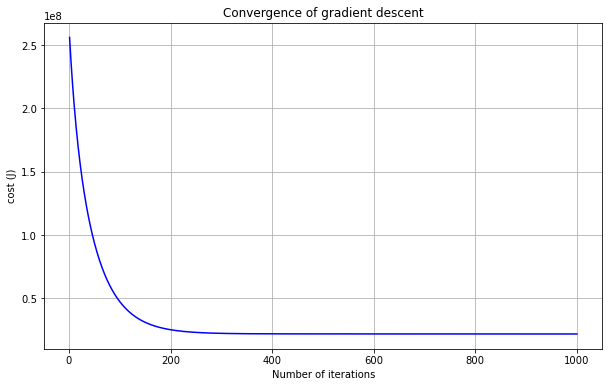

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")
plt.savefig("convergence_of_gradient_descent.png",dpi=200)

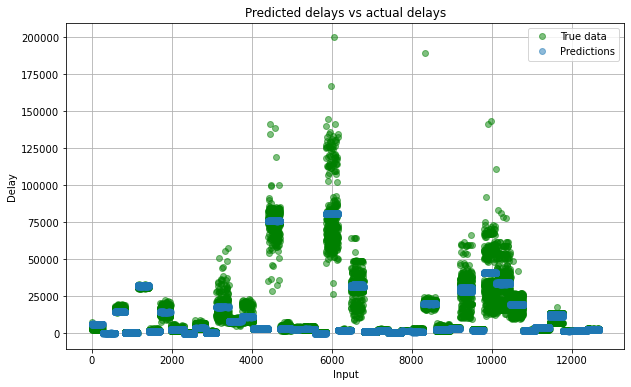

In [59]:
import json
import torch
import json
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

inputs = []
for i in range(len(x_test)):
    inputs.append(i)

plt.clf()
plt.plot(inputs, y_test, 'go', label='True data', alpha=0.5)
plt.plot(inputs, predicted, 'o', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.xlabel("Input")
plt.ylabel("Delay")
plt.title("Predicted delays vs actual delays")
plt.savefig("Predicted_delays_vs_actual_delays.png",dpi=200)

Text(0, 0.5, 'difference between actual and predicted (in fs)')

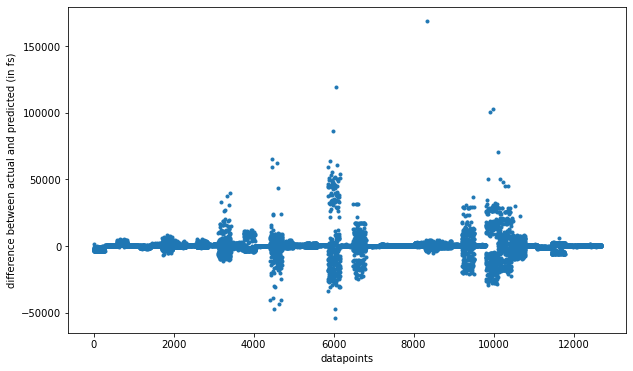

In [58]:
diff = y_test-predicted
plt.plot(diff, '.')
# plt.ylim(-100,100)
plt.xlabel("datapoints")
plt.ylabel("difference between actual and predicted (in fs)")